## Modeling Notebook


In this notebook, we're going to apply various machine learning approaches analyze the mouse retinal data

In [1]:
import sklearn as sk
import anndata as ad
import scanpy as sc 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

sc.settings.n_jobs = -1

In [2]:
adata = ad.read_h5ad('camr_scrublet_batch_filtered.h5ad')

In [3]:
print(adata)

adata.obs.head()

AnnData object with n_obs × n_vars = 294561 × 32034
    obs: 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'pANN', 'sampleid', 'subclass_label', 'majorclass', 'author_cell_type', 'age', 'gender', 'reference', 'accession', 'sample_note', 'development_stage_ontology_term_id', 'tissue_ontology_term_id', 'assay_ontology_term_id', 'disease_ontology_term_id', 'donor_id', 'organism_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'sex_ontology_term_id', 'suspension_type', 'tissue_type', 'library_platform', 'cell_type_ontology_term_id', 'is_primary_data', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid', 'n_genes', 'doublet_score', 'predicted_doublet', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 

,nCount_RNA,nFeature_RNA,percent.mt,pANN,sampleid,subclass_label,majorclass,author_cell_type,age,gender,...,pct_counts_in_top_100_genes,pct_counts_in_top_200_genes,pct_counts_in_top_500_genes,total_counts_mt,log1p_total_counts_mt,pct_counts_mt,leiden_res_0.02,leiden_res_0.50,leiden_res_1.00,leiden_res_2.00
10x3_Ms_WT_P14_AAACCCAAGGGATCTG-1,8090.0,3062.0,9.431397,0.191304,10x3_Ms_WT_P14,NaN,BC,RBC,P14,Male,...,31.965282,41.140732,57.296962,763.0,6.638568,9.460632,0,0,0,0
10x3_Ms_WT_P14_AAACCCACATGGATCT-1,8397.0,3145.0,7.264499,0.217391,10x3_Ms_WT_P14,NaN,BC,RBC,P14,Male,...,31.512253,40.812911,56.724447,610.0,6.415097,7.292289,0,0,0,0
10x3_Ms_WT_P14_AAAGTCCAGCTGAAGC-1,11927.0,3686.0,8.325648,0.200000,10x3_Ms_WT_P14,NaN,BC,RBC,P14,Male,...,33.465097,42.968881,58.359966,993.0,6.901737,8.351556,0,0,0,0
10x3_Ms_WT_P14_AAATGGAGTCACCCTT-1,10331.0,3621.0,6.427258,0.173913,10x3_Ms_WT_P14,NaN,BC,RBC,P14,Male,...,31.726283,40.649300,55.598756,664.0,6.499787,6.454121,0,0,0,0
10x3_Ms_WT_P14_AACACACCAGAACTAA-1,11236.0,3739.0,6.034176,0.165217,10x3_Ms_WT_P14,NaN,BC,RBC,P14,Male,...,30.375457,39.445287,54.882725,678.0,6.520621,6.046553,0,0,0,0


In [4]:
sc.settings.n_jobs

-1

In [5]:
# Only keeping variable genes
adata = adata[:, adata.var.highly_variable]

In [6]:
print(adata)

View of AnnData object with n_obs × n_vars = 294561 × 2175
    obs: 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'pANN', 'sampleid', 'subclass_label', 'majorclass', 'author_cell_type', 'age', 'gender', 'reference', 'accession', 'sample_note', 'development_stage_ontology_term_id', 'tissue_ontology_term_id', 'assay_ontology_term_id', 'disease_ontology_term_id', 'donor_id', 'organism_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'sex_ontology_term_id', 'suspension_type', 'tissue_type', 'library_platform', 'cell_type_ontology_term_id', 'is_primary_data', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid', 'n_genes', 'doublet_score', 'predicted_doublet', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_count

In [7]:
# Calculating Cluster Specific Differentially Expressed Genes
sc.tl.rank_genes_groups(adata, groupby="leiden_res_0.02", method="wilcoxon")


/project/hipaa_ycheng11lab/atlas/CAMR2024/py311env/lib/python3.11/site-packages/scanpy/tools/_rank_genes_groups.py:645: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


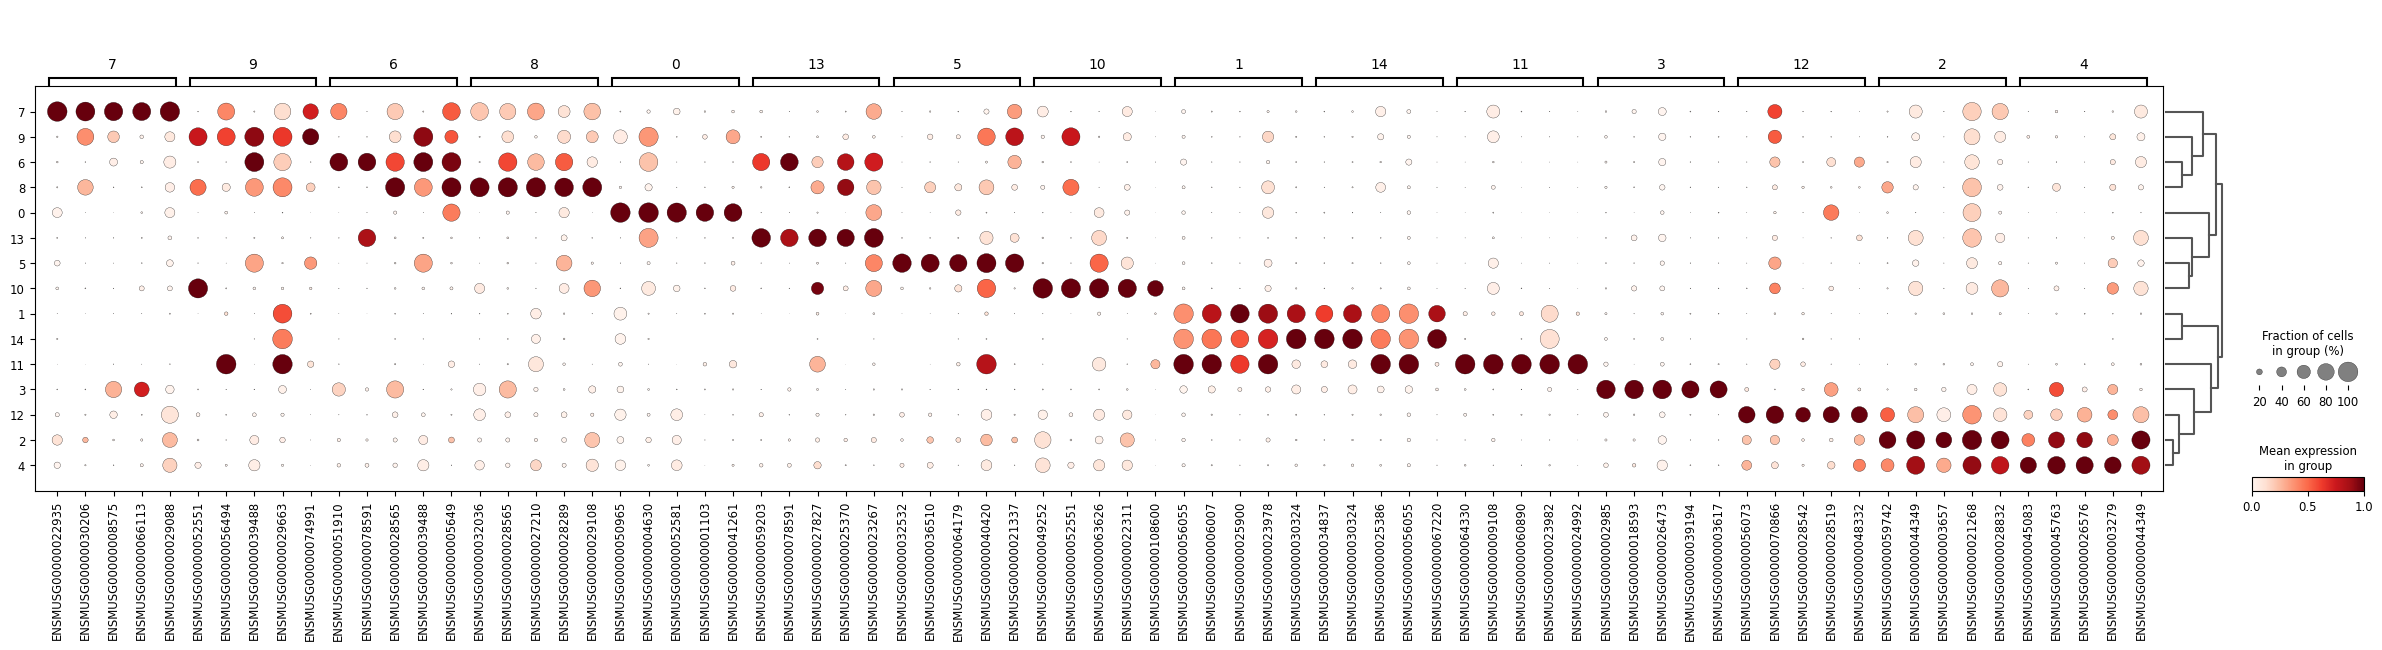

<Figure size 640x480 with 0 Axes>

In [8]:
sc.pl.rank_genes_groups_dotplot(
    adata, groupby="leiden_res_0.02", standard_scale="var", n_genes=5,
)

plt.savefig('figures/modeling/rank_gene_groups_leiden_res_0.02.png')

## Cell Type Classification

### Random Forrest Classifier

In [7]:
from scipy.sparse import issparse
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
import seaborn as sns

In [8]:
# Extract feature matrix (X) and target vector (y)
X = adata.X
y = adata.obs['majorclass']

# Convert sparse matrix to dense if necessary
if issparse(X):
    X = X.toarray()

# Encode the target variable
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

In [9]:
type(X)

numpy.ndarray

In [10]:
# Initialize the classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)

KeyboardInterrupt: 

Seems faster training after only keeping highly variable genes
Takes ~5 mins compared to at least 40 without (might be long I stopped the running)
Takes about 30gb memory vs 180gb before

In [13]:
# Make predictions on the test set
y_pred_rf = rf_classifier.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred_rf, target_names=le.classes_))

              precision    recall  f1-score   support

          AC       1.00      1.00      1.00      8191
   Astrocyte       0.95      0.99      0.97       253
          BC       1.00      1.00      1.00     27477
        Cone       1.00      1.00      1.00       923
 Endothelial       1.00      0.99      0.99       235
          HC       1.00      0.67      0.80        21
          MG       1.00      0.98      0.99      1493
   Microglia       1.00      1.00      1.00      1167
    Pericyte       1.00      0.98      0.99        86
         RGC       1.00      1.00      1.00     12234
         RPE       0.98      0.98      0.98        95
         Rod       1.00      1.00      1.00      6738

    accuracy                           1.00     58913
   macro avg       0.99      0.96      0.98     58913
weighted avg       1.00      1.00      1.00     58913



In [ ]:
# Save the model to file
import joblib

# Save the RandomForest classifier
model_filename = 'models/rf_classifier.pkl'
joblib.dump(rf_classifier, model_filename)

# Save the LabelEncoder
le_filename = 'models/le.pkl'
joblib.dump(le, le_filename)


['models/le.pkl']

In [11]:
# # Code to import
# import joblib

# # Load the RandomForest classifier
# rf_classifier = joblib.load('models/rf_classifier.pkl')

# # Load the LabelEncoder
# le = joblib.load('models/le.pkl')


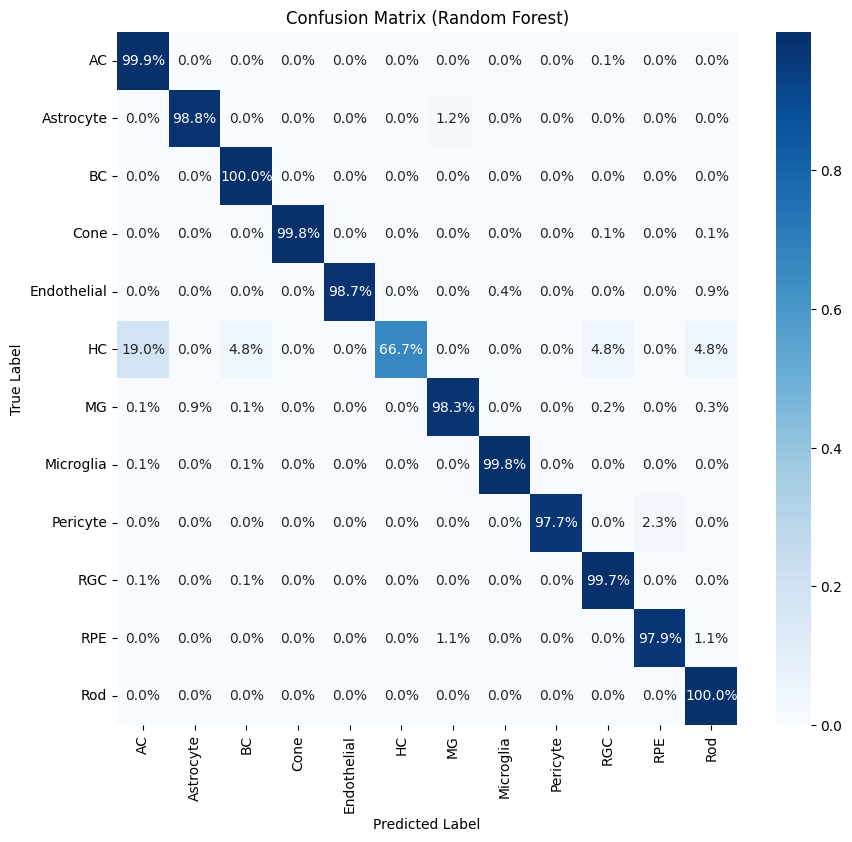

In [14]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred_rf, labels=rf_classifier.classes_)

# Make percentage
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Plot the confusion matrix
plt.figure(figsize=(10, 9))
sns.heatmap(cm_normalized, annot=True, fmt='.1%', cmap='Blues', 
            xticklabels=le.inverse_transform(rf_classifier.classes_), 
            yticklabels=le.inverse_transform(rf_classifier.classes_))

# Create Labels
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (Random Forest)')

# Save Figure to File
plt.savefig("figures/modeling/random_forest_majorclass_confusion_matrix", bbox_inches='tight')
plt.show()

In [15]:
adata.obs['majorclass'].value_counts()

majorclass
BC             137010
RGC             61205
AC              40613
Rod             33760
MG               7779
Microglia        6084
Cone             4693
Astrocyte        1344
Endothelial      1154
Pericyte          403
RPE               390
HC                126
Name: count, dtype: int64

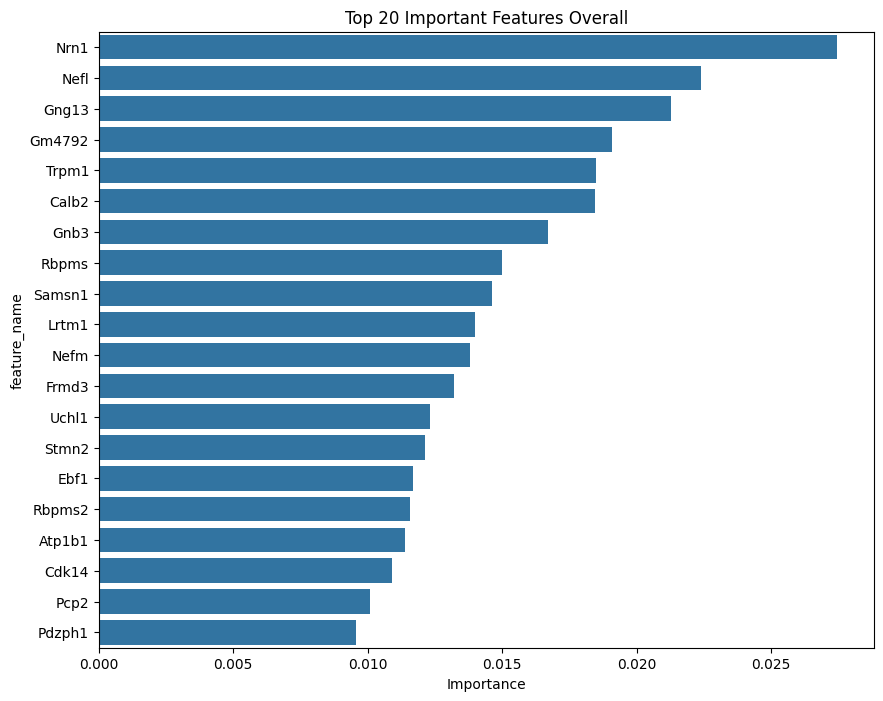

In [16]:
# Get feature importances
feature_importances_rf = rf_classifier.feature_importances_

# Create a DataFrame for better visualization
feature_importance_rf_df = pd.DataFrame({
    'ESUM': adata.var_names,
    'feature_name': adata.var['feature_name'].astype(str),  # Ensure feature_name is string
    'Importance': feature_importances_rf
})

feature_importance_rf_df = feature_importance_rf_df.sort_values(by='Importance', ascending=False).reset_index(drop=True)

# Plot the top 20 important features overall
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='feature_name', data=feature_importance_rf_df.head(20))
plt.title('Top 20 Important Features Overall')

# Save Fig
plt.savefig('figures/modeling/random_forest_top_20_feature_importance')
plt.show()


In [17]:
feature_importance_rf_df

,ESUM,feature_name,Importance
0,ENSMUSG00000039114,Nrn1,2.745054e-02
1,ENSMUSG00000022055,Nefl,2.241426e-02
2,ENSMUSG00000025739,Gng13,2.126896e-02
3,ENSMUSG00000053420,Gm4792,1.910518e-02
4,ENSMUSG00000030523,Trpm1,1.850227e-02
...,...,...,...
2170,ENSMUSG00000090035,Galnt4,2.326271e-07
2171,ENSMUSG00000086306,Gm11754,2.014539e-07
2172,ENSMUSG00000035042,Ccl5,1.197949e-07
2173,ENSMUSG00000115345,Gm33497,6.798601e-08


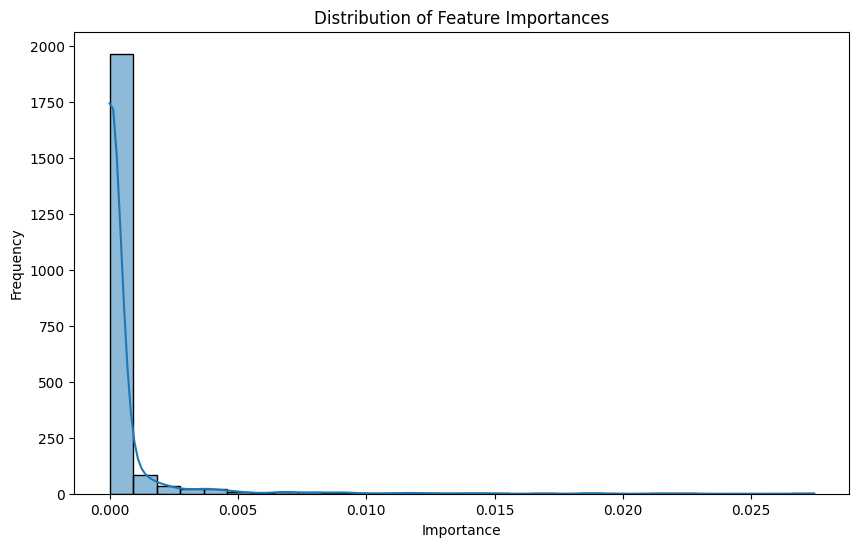

In [18]:
# Plot the distribution of feature importances
plt.figure(figsize=(10, 6))
sns.histplot(feature_importance_rf_df['Importance'], bins=30, kde=True)
plt.title('Distribution of Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Frequency')

#Save figure
plt.savefig('figures/modeling/random_forest_feature_importance_distribution')

plt.show()

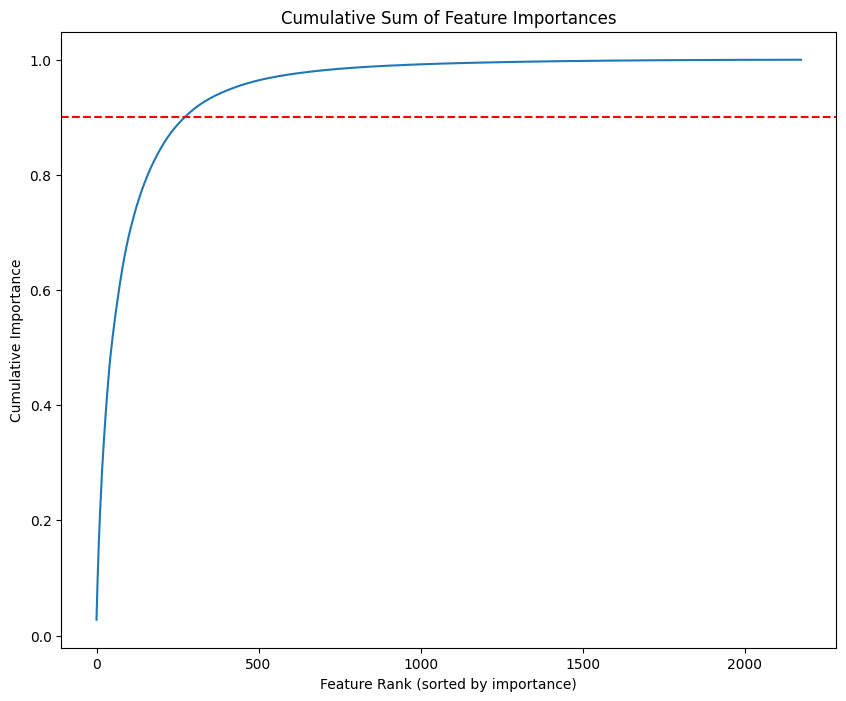

In [19]:
# Calculate the cumulative sum of importances
feature_importance_rf_df['Cumulative Importance'] = feature_importance_rf_df['Importance'].cumsum()

# Plot the cumulative sum
plt.figure(figsize=(10, 8))
sns.lineplot(data=feature_importance_rf_df, x=feature_importance_rf_df.index, y='Cumulative Importance')
plt.axhline(y=0.9, color='r', linestyle='--')  # Line at 90% cumulative importance
plt.xticks(ticks=range(0, len(feature_importance_rf_df), 500))  # Set x-ticks at increments of 100
plt.xlabel('Feature Rank (sorted by importance)')
plt.ylabel('Cumulative Importance')
plt.title('Cumulative Sum of Feature Importances')

#save fig
plt.savefig('figures/modeling/random_forest_cumulative_feature_importance_distribution')

plt.show()

In [32]:
# For class-specific analysis, you can inspect trees or use permutation importance
# Using permutation importance from sklearn
from sklearn.inspection import permutation_importance

result = permutation_importance(rf_classifier, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2)

perm_sorted_idx = result.importances_mean.argsort()

# Plot permutation importance for the top 20 features
plt.figure(figsize=(10, 8))
plt.boxplot(result.importances[perm_sorted_idx].T, vert=False, labels=np.array(adata.var_names)[perm_sorted_idx])
plt.title('Permutation Importance (test set)')
plt.show()

KeyboardInterrupt: 

### One-vs-Rest Logistic Regression
Want to get feature importance per class

In [20]:
from sklearn.linear_model import LogisticRegression

# Initialize the One-vs-Rest Logistic Regression model
ovr_classifier = LogisticRegression(multi_class='ovr', max_iter=1000, random_state=42)

# Train the classifier
ovr_classifier.fit(X_train, y_train)


/project/hipaa_ycheng11lab/atlas/CAMR2024/py311env/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=1000, multi_class='ovr', random_state=42)

In [23]:
# Save the model to file
import joblib

# Save the  classifier
model_filename = 'models/ovr_classifier.pkl'
joblib.dump(ovr_classifier, model_filename)

# # Load the RandomForest classifier
ovr_classifier = joblib.load('models/ovr_classifier.pkl')


In [24]:
# Make predictions on the test set
y_pred_ovr = ovr_classifier.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred_ovr, target_names=le.classes_))


              precision    recall  f1-score   support

          AC       1.00      1.00      1.00      8191
   Astrocyte       1.00      0.99      0.99       253
          BC       1.00      1.00      1.00     27477
        Cone       1.00      1.00      1.00       923
 Endothelial       1.00      0.99      0.99       235
          HC       0.91      1.00      0.95        21
          MG       0.99      1.00      1.00      1493
   Microglia       1.00      1.00      1.00      1167
    Pericyte       1.00      0.98      0.99        86
         RGC       1.00      1.00      1.00     12234
         RPE       0.98      0.99      0.98        95
         Rod       1.00      1.00      1.00      6738

    accuracy                           1.00     58913
   macro avg       0.99      0.99      0.99     58913
weighted avg       1.00      1.00      1.00     58913



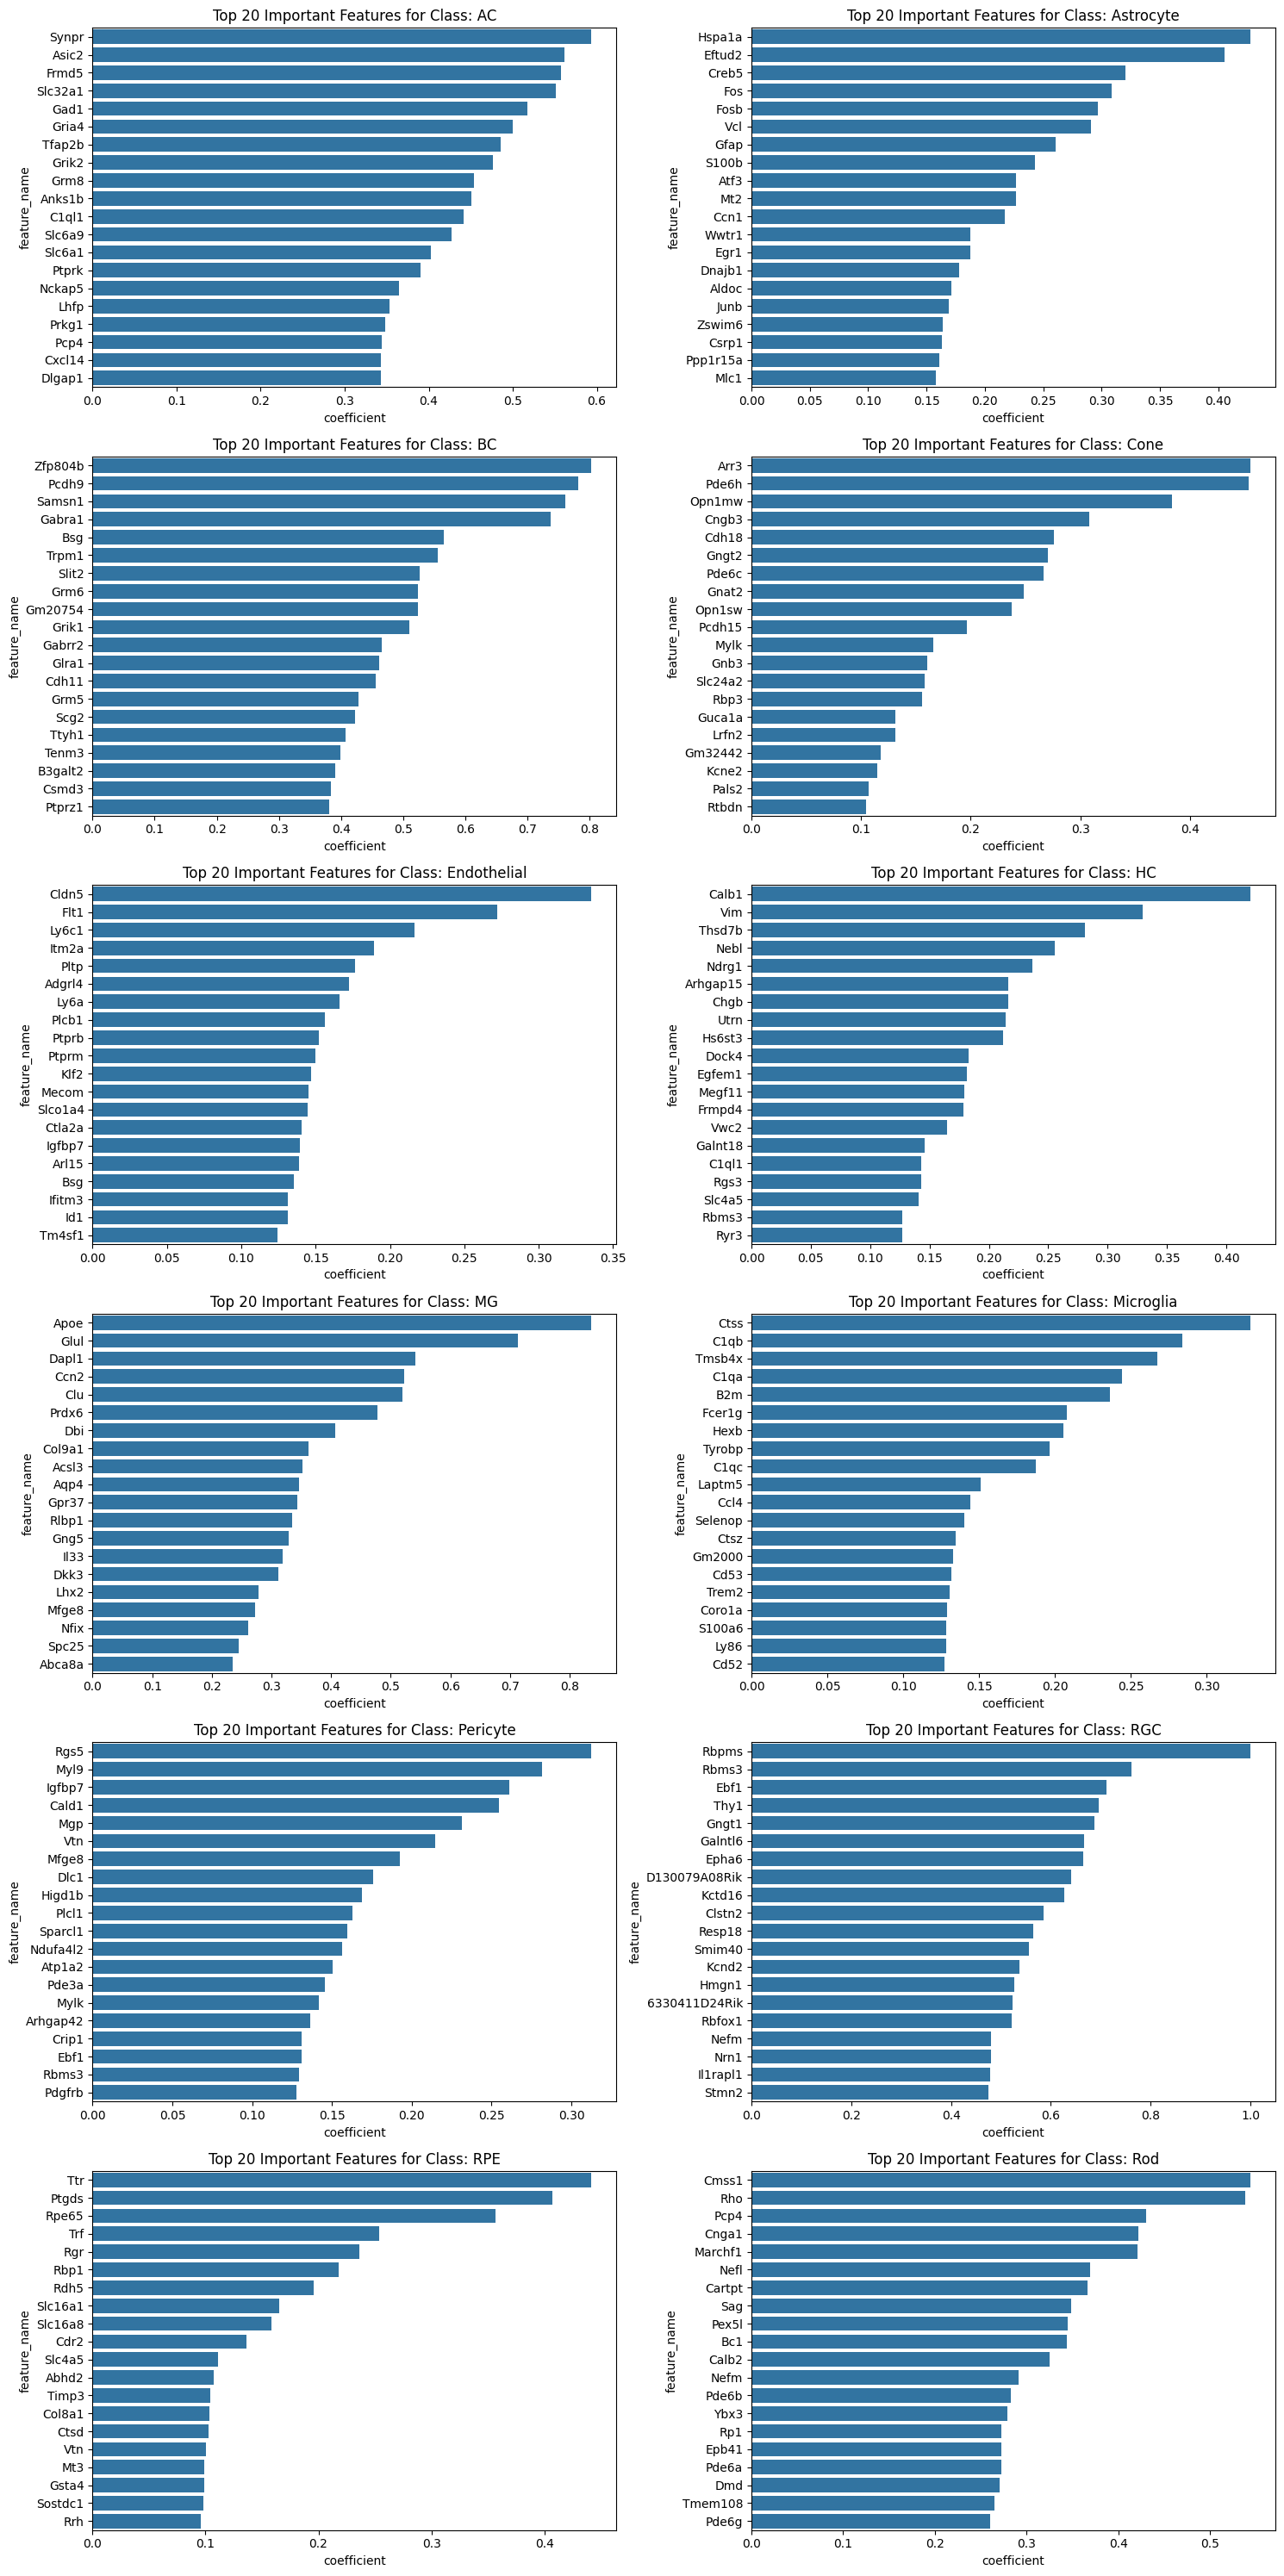

In [25]:
# Get class-specific coefficients
class_coefficients = ovr_classifier.coef_

# Number of classes
num_classes = len(le.classes_)

number_of_features = 20

# Determine the grid size (e.g., 2 rows, num_classes / 2 columns)
nrows = (num_classes // 2) + (num_classes % 2)
ncols = 2

# Create a figure with subplots
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 5 * nrows))
axes = axes.flatten()  # Flatten the 2D array of axes to 1D

# Plot the top 5 important features for each class in a grid
for idx, class_name in enumerate(le.classes_):
    coefficients = class_coefficients[idx]
    feature_importance_ovr_df = pd.DataFrame({
        'ESUM': adata.var_names,
        'feature_name': adata.var['feature_name'].astype(str),  # Ensure feature_name is string
        'coefficient': coefficients
    })
    feature_importance_ovr_df = feature_importance_ovr_df.sort_values(by='coefficient', ascending=False).head(number_of_features)

    # Plot the top 20 important features for each class
    sns.barplot(ax=axes[idx], x='coefficient', y='feature_name', data=feature_importance_ovr_df)
    axes[idx].set_title(f'Top {number_of_features} Important Features for Class: {class_name}')

# Remove any unused subplots
for ax in axes[num_classes:]:
    ax.remove()

plt.tight_layout()

plt.savefig('figures/modeling/ovr_feature_importance_by_majorclass')

plt.show()


In [29]:
# Save OVR feature importance to an excel file

# Create a DataFrame to store top 20 features for each cell type
top_features_df = pd.DataFrame(columns=['Cell Type', 'Gene', 'Coefficient'])

# Loop over each cell type
for idx, class_name in enumerate(le.classes_):
    coefficients = class_coefficients[idx]
    feature_importance_ovr_df = pd.DataFrame({
        'Gene': adata.var['feature_name'].astype(str),
        'Coefficient': coefficients
    })
    top_features = feature_importance_ovr_df.sort_values(by='Coefficient', ascending=False).head(number_of_features)

    # Append the top features for this class to the DataFrame
    top_features_per_type_df = pd.DataFrame({
        'Cell Type': [class_name] * number_of_features,
        'Gene': top_features['Gene'],
        'Coefficient': top_features['Coefficient']
    })
    top_features_df = pd.concat([top_features_df, top_features_per_type_df], ignore_index=True)


top_features_df.to_csv('spreadsheets/ovr_top_20_genes_by_cell_type.csv', index=False)

/tmp/ipykernel_72512/1222373115.py:21: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  top_features_df = pd.concat([top_features_df, top_features_per_type_df], ignore_index=True)


## Cell Sub-Type Classification

Comparing author_cell_type vs subclass_label. Maybe ask Yuyan what each means

In [ ]:
adata.obs['author_cell_type'].unique()

['RBC', 'Rod', 'MG', 'BC6', 'BC5A', ..., 'AC_54', 'AC_53', 'AC_62', 'Astrocyte', 'Microglia(cycling)']
Length: 136
Categories (136, object): ['1_W3D1.1', '2_W3D1.2', '3_FminiON', '4_FminiOFF', ..., 'RBC', 'RGC', 'RPE', 'Rod']

In [ ]:
adata.obs['author_cell_type'].value_counts()

author_cell_type
RBC             34155
Rod             33760
BC6             19978
BC5A            18571
BC7             15696
                ...  
AC_63              14
45_AlphaOFFT       11
AC_53               6
AC_60               2
AC_62               1
Name: count, Length: 136, dtype: int64

In [ ]:
adata.obs['subclass_label'].unique()

[NaN, 'RBC', 'BC6', 'BC5A', 'BC3B', ..., '38_FmidiON', '34_Novel', '42_AlphaOFFS', '45_AlphaOFFT', '43_AlphaONS']
Length: 122
Categories (121, object): ['1_W3D1.1', '2_W3D1.2', '3_FminiON', '4_FminiOFF', ..., 'BC6', 'BC7', 'BC8_9', 'RBC']

In [ ]:
adata.obs['subclass_label'].value_counts()

subclass_label
1_W3D1.1        3322
2_W3D1.2        3312
3_FminiON       2427
4_FminiOFF      2263
5_J-RGC         2018
                ... 
AC_16             10
AC_63             10
43_AlphaONS        7
AC_53              4
45_AlphaOFFT       3
Name: count, Length: 121, dtype: int64

### Random Forrest Classifier

In [ ]:
from scipy.sparse import issparse
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
import seaborn as sns

In [ ]:
# Extract feature matrix (X) and target vector (y)
X = adata.X
y_subclass = adata.obs['author_cell_type']

# Convert sparse matrix to dense if necessary
if issparse(X):
    X = X.toarray()

# Encode the target variable
le_subclass = LabelEncoder()
y_encoded_subclass = le_subclass.fit_transform(y_subclass)

# Split data into training and testing sets
X_train, X_test, y_train_subclass, y_test_subclass = train_test_split(
    X, y_encoded_subclass, test_size=0.2, random_state=42)

In [ ]:
# Initialize the classifier
rf_classifier_subclass = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rf_classifier_subclass.fit(X_train, y_train_subclass)

RandomForestClassifier(random_state=42)

In [ ]:
# Make predictions on the test set
y_pred_subclass_rf = rf_classifier_subclass.predict(X_test)

# Verify the number of unique classes
num_classes_in_y = len(np.unique(y_encoded_subclass))
num_classes_in_le = len(le_subclass.classes_)

print(f'Number of unique classes in y_encoded_subclass: {num_classes_in_y}')
print(f'Number of classes in le_subclass.classes_: {num_classes_in_le}')

Number of unique classes in y_encoded_subclass: 136
Number of classes in le_subclass.classes_: 136


Seems faster training after only keeping highly variable genes
Takes ~5 mins compared to at least 40 without (might be long I stopped the running)
Takes about 30gb memory vs 180gb before

In [ ]:
# Ensure target names match the encoded classes
target_names = le_subclass.inverse_transform(np.unique(y_test_subclass))

# Print classification report
print(classification_report(y_test_subclass, y_pred_subclass_rf, target_names=target_names))

                    precision    recall  f1-score   support

          10_Novel       0.98      0.99      0.99       199
          11_Novel       0.99      0.99      0.99       250
        12_ooDS_NT       0.97      0.99      0.98       238
          13_Novel       0.97      0.99      0.98       283
       14_ooDS_Cck       0.99      0.99      0.99       316
          15_Novel       0.99      0.99      0.99       282
        16_ooDS_DV       0.98      1.00      0.99       201
        17_Tbr1_S1       0.97      0.99      0.98       313
          18_Novel       0.90      0.96      0.93       187
          19_Novel       0.98      0.98      0.98       232
          1_W3D1.1       0.96      0.99      0.98      1336
          20_Novel       0.98      1.00      0.99       246
        21_Tbr1_S2       0.99      0.99      0.99       191
             22_M5       0.97      0.93      0.95       199
           23_W3D2       0.99      0.98      0.99       190
          24_Novel       0.96      0.99

/project/hipaa_ycheng11lab/atlas/CAMR2024/py311env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/project/hipaa_ycheng11lab/atlas/CAMR2024/py311env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/project/hipaa_ycheng11lab/atlas/CAMR2024/py311env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

In [ ]:
# Save the model to file
import joblib

# Save the RandomForest classifier
model_filename = 'models/rf_classifier_subclass.pkl'
joblib.dump(rf_classifier_subclass, model_filename)

# Save the LabelEncoder
le_filename = 'models/le_subclass.pkl'
joblib.dump(le_subclass, le_filename)


['models/le_subclass.pkl']

In [ ]:
# # Code to import
# import joblib

# # Load the RandomForest classifier
# rf_classifier_subclass = joblib.load('rf_classifier_subclass.pkl')

# # Load the LabelEncoder
# le_subclass = joblib.load('le_subclass.pkl')


/tmp/ipykernel_40722/238130054.py:7: RuntimeWarning: invalid value encountered in divide
  cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


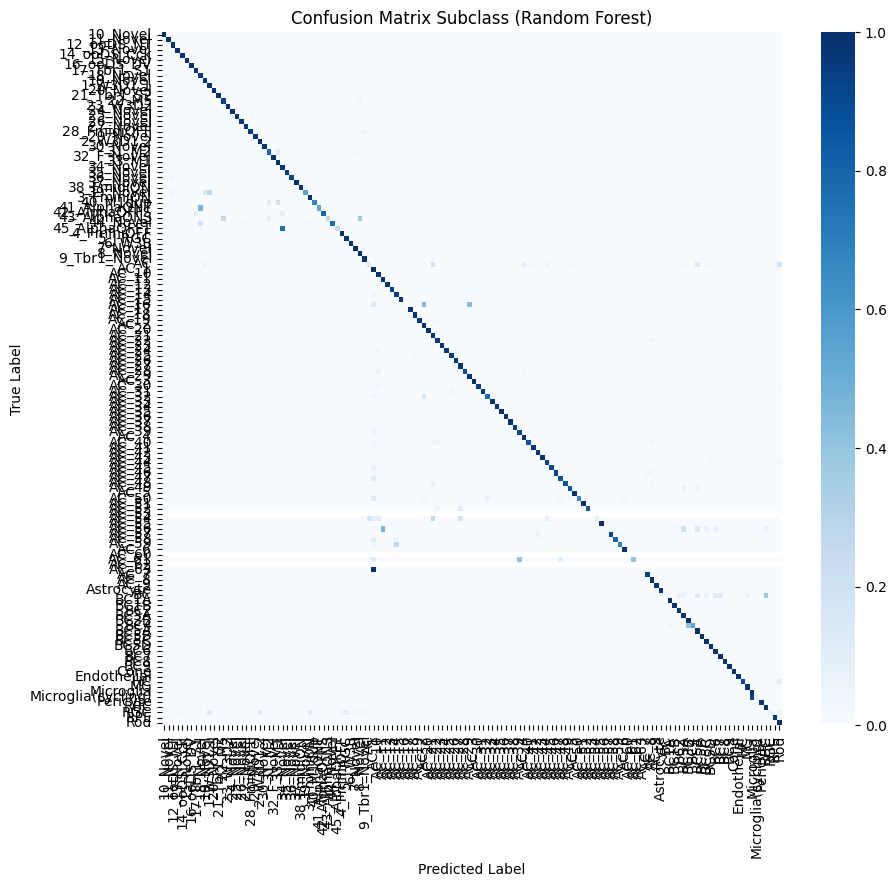

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred_subclass_rf, labels=rf_classifier.classes_)

# Make percentage
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Plot the confusion matrix
plt.figure(figsize=(10, 9))
sns.heatmap(cm_normalized, cmap='Blues', 
            xticklabels=le.inverse_transform(rf_classifier_subclass.classes_), 
            yticklabels=le.inverse_transform(rf_classifier_subclass.classes_))

# Create Labels
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Subclass (Random Forest)')

# Save Figure to File
plt.savefig("figures/modeling/random_forest_subclass_confusion_matrix", bbox_inches='tight')
plt.show()

In [32]:
adata.obs['author_cell_type'].value_counts()

author_cell_type
RBC             34155
Rod             33760
BC6             19978
BC5A            18571
BC7             15696
                ...  
AC_63              14
45_AlphaOFFT       11
AC_53               6
AC_60               2
AC_62               1
Name: count, Length: 136, dtype: int64

In [65]:
# Testing model manually

# Define the index of the cell you want to test
cell_index = 1025  # Change this to the desired cell index

# Extract the single cell's features
single_cell = X[cell_index].reshape(1, -1)

# Predict the log-probabilities for the single cell
log_proba = rf_classifier_subclass.predict_log_proba(single_cell)

# Get the top 10 classes with the highest log-probabilities
top_10_indices = np.argsort(log_proba[0])[-10:][::-1]
top_10_log_proba = log_proba[0][top_10_indices]
top_10_classes = le_subclass.inverse_transform(top_10_indices)

# Predict the class for the single cell
predicted_class_encoded = rf_classifier_subclass.predict(single_cell)

# Decode the predicted class
predicted_class = le_subclass.inverse_transform(predicted_class_encoded)

# Get the true class for the single cell
true_class = y_subclass.iloc[cell_index]

# Print the result
print(f'Predicted class for cell index {cell_index}: {predicted_class[0]}')
print(f'True class for cell index {cell_index}: {true_class}')

# Print the top 10 log-probabilities for each class
print(f'Top 10 log-probabilities for cell index {cell_index}:')
for class_name, log_prob in zip(top_10_classes, top_10_log_proba):
    print(f'Class: {class_name}, Log-probability: {log_prob:.4f}')

Predicted class for cell index 1025: Rod
True class for cell index 1025: Rod
Top 10 log-probabilities for cell index 1025:
Class: Rod, Log-probability: -0.0101
Class: BC3A, Log-probability: -4.6052
Class: AC_12, Log-probability: -inf
Class: AC_11, Log-probability: -inf
Class: AC_10, Log-probability: -inf
Class: AC_1, Log-probability: -inf
Class: AC, Log-probability: -inf
Class: 9_Tbr1_Novel, Log-probability: -inf
Class: 41_AlphaONT, Log-probability: -inf
Class: 7_Novel, Log-probability: -inf


/project/hipaa_ycheng11lab/atlas/CAMR2024/py311env/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:994: RuntimeWarning: divide by zero encountered in log
  return np.log(proba)


In [60]:
# Get the decision path for the single cell
decision_path = rf_classifier_subclass.decision_path(single_cell)

# Print the decision path
print(f'Decision path for cell index {cell_index}:')
print(decision_path)

Decision path for cell index 1025:
(<1x3539002 sparse matrix of type '<class 'numpy.int64'>'
	with 2874 stored elements in Compressed Sparse Row format>, array([      0,   34903,   70430,  105323,  140438,  175755,  209418,
        244601,  279860,  315521,  351208,  387075,  423848,  458391,
        494738,  530143,  566294,  601977,  641586,  676889,  711242,
        743765,  780042,  816279,  851362,  886171,  920350,  955891,
        992292, 1029711, 1065468, 1099753, 1134842, 1170513, 1207472,
       1243279, 1278124, 1312589, 1348982, 1385785, 1421680, 1458041,
       1495062, 1531215, 1568236, 1601771, 1635422, 1667655, 1701690,
       1736949, 1774042, 1809279, 1843224, 1876125, 1914752, 1948209,
       1983136, 2019821, 2054824, 2091229, 2126108, 2161139, 2197836,
       2233331, 2269052, 2304791, 2339154, 2374889, 2411460, 2446809,
       2483528, 2517173, 2549690, 2584681, 2621852, 2656669, 2691834,
       2726955, 2763206, 2797095, 2832824, 2868397, 2903182, 2939487,
      

In [67]:
import numpy as np
from sklearn.tree import _tree, export_text

# Extract the single cell's features
single_cell = X[cell_index].reshape(1, -1)

# Select the most important tree (for example, the first tree)
tree_index = 0  # Change this to select a different tree
tree = rf_classifier_subclass.estimators_[tree_index]

# Get the decision path for the single cell in the selected tree
node_indicator = tree.decision_path(single_cell)
leaf_id = tree.apply(single_cell)

# Extract the feature and threshold information
feature = tree.tree_.feature
threshold = tree.tree_.threshold

# Get the node indices along the decision path
node_index = node_indicator.indices[node_indicator.indptr[0]:node_indicator.indptr[1]]

# Print the decision path
print(f'Decision path for cell index {cell_index} in tree {tree_index}:')
for node_id in node_index:
    if leaf_id[0] == node_id:
        print(f"Node {node_id}: leaf node.")
    else:
        # Get feature name (gene) and threshold
        feature_name = adata.var['feature_name'][feature[node_id]]
        threshold_value = threshold[node_id]
        if single_cell[0, feature[node_id]] <= threshold_value:
            threshold_sign = "<="
        else:
            threshold_sign = ">"
        print(f"Node {node_id}: split on {feature_name} {threshold_sign} {threshold_value:.4f}")

# Optional: Print the text representation of the tree for reference
tree_rules = export_text(tree, feature_names=adata.var['feature_name'])
print(tree_rules)

Decision path for cell index 1025 in tree 0:
Node 0: split on Reep6 > 0.7411
Node 34338: split on Fgf13 <= 0.1602
Node 34339: split on Rgs7 <= 0.1791
Node 34340: split on Fcgr3 <= 0.3216
Node 34341: split on Aqp4 <= 1.5590
Node 34342: split on Dbi <= 2.3887
Node 34343: split on C1ql1 <= 1.5342
Node 34344: split on Synpr > 1.0698
Node 34486: split on Samd11 > 0.4216
Node 34534: split on Nfib <= 0.5919
Node 34535: split on Dnajb1 <= 1.1841
Node 34536: split on Slc6a5 <= 0.5366
Node 34537: leaf node.
|--- Reep6 <= 0.74
|   |--- Ralgapa2 <= 1.18
|   |   |--- Prph2 <= 2.04
|   |   |   |--- Vsx1 <= 0.23
|   |   |   |   |--- Gm30382 <= 1.30
|   |   |   |   |   |--- Dmd <= 1.89
|   |   |   |   |   |   |--- Prdx6 <= 1.53
|   |   |   |   |   |   |   |--- Pcp2 <= 3.41
|   |   |   |   |   |   |   |   |--- C1qb <= 1.56
|   |   |   |   |   |   |   |   |   |--- Cpne4 <= 0.38
|   |   |   |   |   |   |   |   |   |   |--- Cldn5 <= 1.02
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of

/tmp/ipykernel_40722/1379868168.py:29: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  feature_name = adata.var['feature_name'][feature[node_id]]


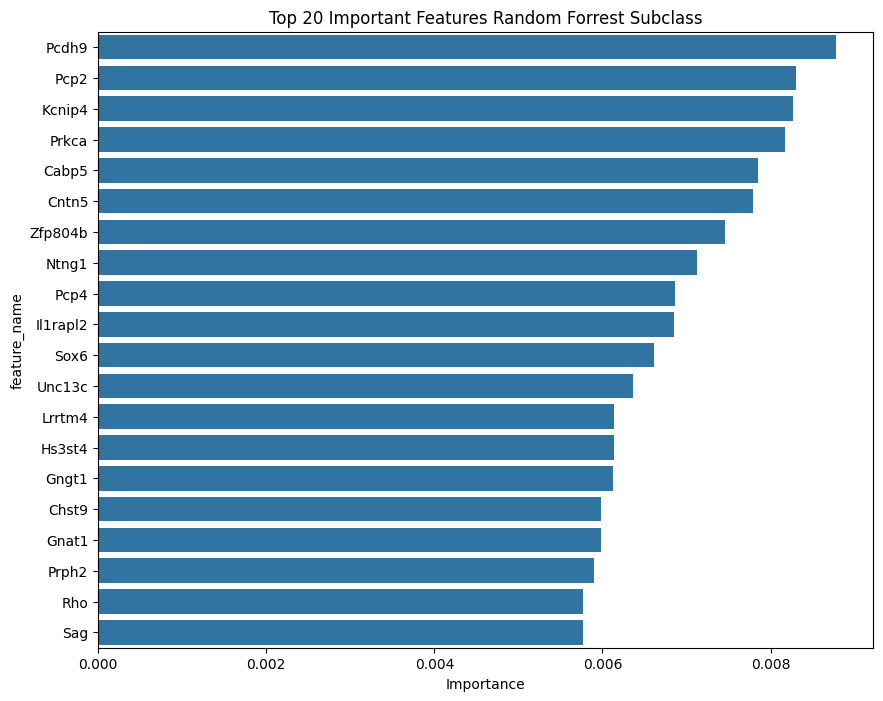

In [33]:
# Get feature importances
feature_importances_subclass_rf = rf_classifier_subclass.feature_importances_

# Create a DataFrame for better visualization
feature_importance_subclass_rf_df = pd.DataFrame({
    'ESUM': adata.var_names,
    'feature_name': adata.var['feature_name'].astype(str),  # Ensure feature_name is string
    'Importance': feature_importances_subclass_rf
})

feature_importance_subclass_rf_df = feature_importance_subclass_rf_df.sort_values(
    by='Importance', ascending=False).reset_index(drop=True)

# Plot the top 20 important features overall
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='feature_name', data=feature_importance_subclass_rf_df.head(20))
plt.title('Top 20 Important Features Random Forrest Subclass')

# Save Fig
plt.savefig('figures/modeling/random_forest_subclass_top_20_feature_importance')
plt.show()


In [42]:
feature_importance_subclass_rf_df

,ESUM,feature_name,Importance
0,ENSMUSG00000055421,Pcdh9,8.779150e-03
1,ENSMUSG00000004630,Pcp2,8.296512e-03
2,ENSMUSG00000029088,Kcnip4,8.263810e-03
3,ENSMUSG00000050965,Prkca,8.165133e-03
4,ENSMUSG00000005649,Cabp5,7.855418e-03
...,...,...,...
2170,ENSMUSG00000113671,Gm2233,5.243206e-07
2171,ENSMUSG00000085327,Gm16104,5.078498e-07
2172,ENSMUSG00000086306,Gm11754,5.061805e-07
2173,ENSMUSG00000035539,Ccdc180,3.100465e-07


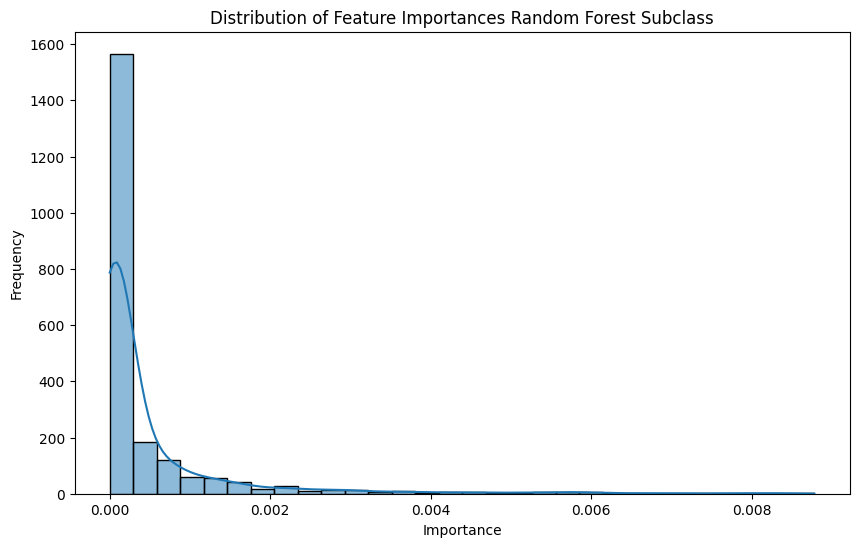

In [43]:
# Plot the distribution of feature importances
plt.figure(figsize=(10, 6))
sns.histplot(feature_importance_subclass_rf_df['Importance'], bins=30, kde=True)
plt.title('Distribution of Feature Importances Random Forest Subclass')
plt.xlabel('Importance')
plt.ylabel('Frequency')

#Save figure
plt.savefig('figures/modeling/random_forest_subclass_feature_importance_distribution')

plt.show()

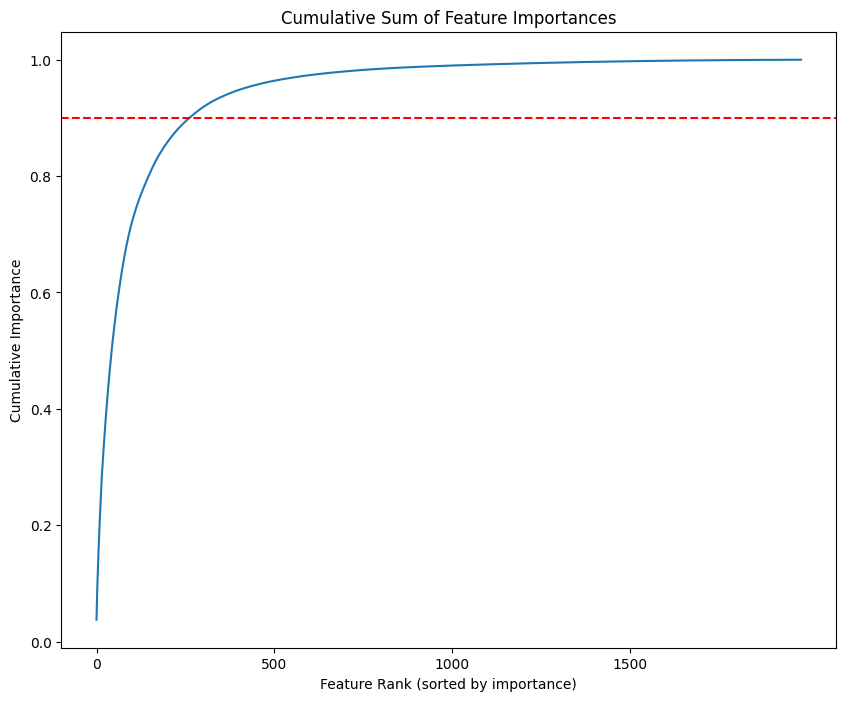

In [ ]:
# Calculate the cumulative sum of importances
feature_importance_rf_df['Cumulative Importance'] = feature_importance_rf_df['Importance'].cumsum()

# Plot the cumulative sum
plt.figure(figsize=(10, 8))
sns.lineplot(data=feature_importance_rf_df, x=feature_importance_rf_df.index, y='Cumulative Importance')
plt.axhline(y=0.9, color='r', linestyle='--')  # Line at 90% cumulative importance
plt.xticks(ticks=range(0, len(feature_importance_rf_df), 500))  # Set x-ticks at increments of 100
plt.xlabel('Feature Rank (sorted by importance)')
plt.ylabel('Cumulative Importance')
plt.title('Cumulative Sum of Feature Importances Subclass')

#save fig
plt.savefig('figures/modeling/random_forest_subclass_cumulative_feature_importance_distribution')

plt.show()

### One vs Rest

In [ ]:
from sklearn.linear_model import LogisticRegression

# Initialize the One-vs-Rest Logistic Regression model
ovr_classifier_subclass = LogisticRegression(multi_class='ovr', max_iter=1000, random_state=42)

# Train the classifier
ovr_classifier_subclass.fit(X_train, y_train_subclass)


/project/hipaa_ycheng11lab/atlas/CAMR2024/py311env/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=1000, multi_class='ovr', random_state=42)

In [ ]:
# Make predictions on the test set
y_pred_subclass_ovr = ovr_classifier.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred_subclass_ovr, target_names=le.classes_))


              precision    recall  f1-score   support

          AC       1.00      1.00      1.00      8191
   Astrocyte       1.00      0.99      0.99       253
          BC       1.00      1.00      1.00     27477
        Cone       1.00      1.00      1.00       923
 Endothelial       1.00      0.99      0.99       235
          HC       0.91      1.00      0.95        21
          MG       0.99      1.00      1.00      1493
   Microglia       1.00      1.00      1.00      1167
    Pericyte       1.00      0.98      0.99        86
         RGC       1.00      1.00      1.00     12234
         RPE       0.98      0.99      0.98        95
         Rod       1.00      1.00      1.00      6738

    accuracy                           1.00     58913
   macro avg       0.99      0.99      0.99     58913
weighted avg       1.00      1.00      1.00     58913



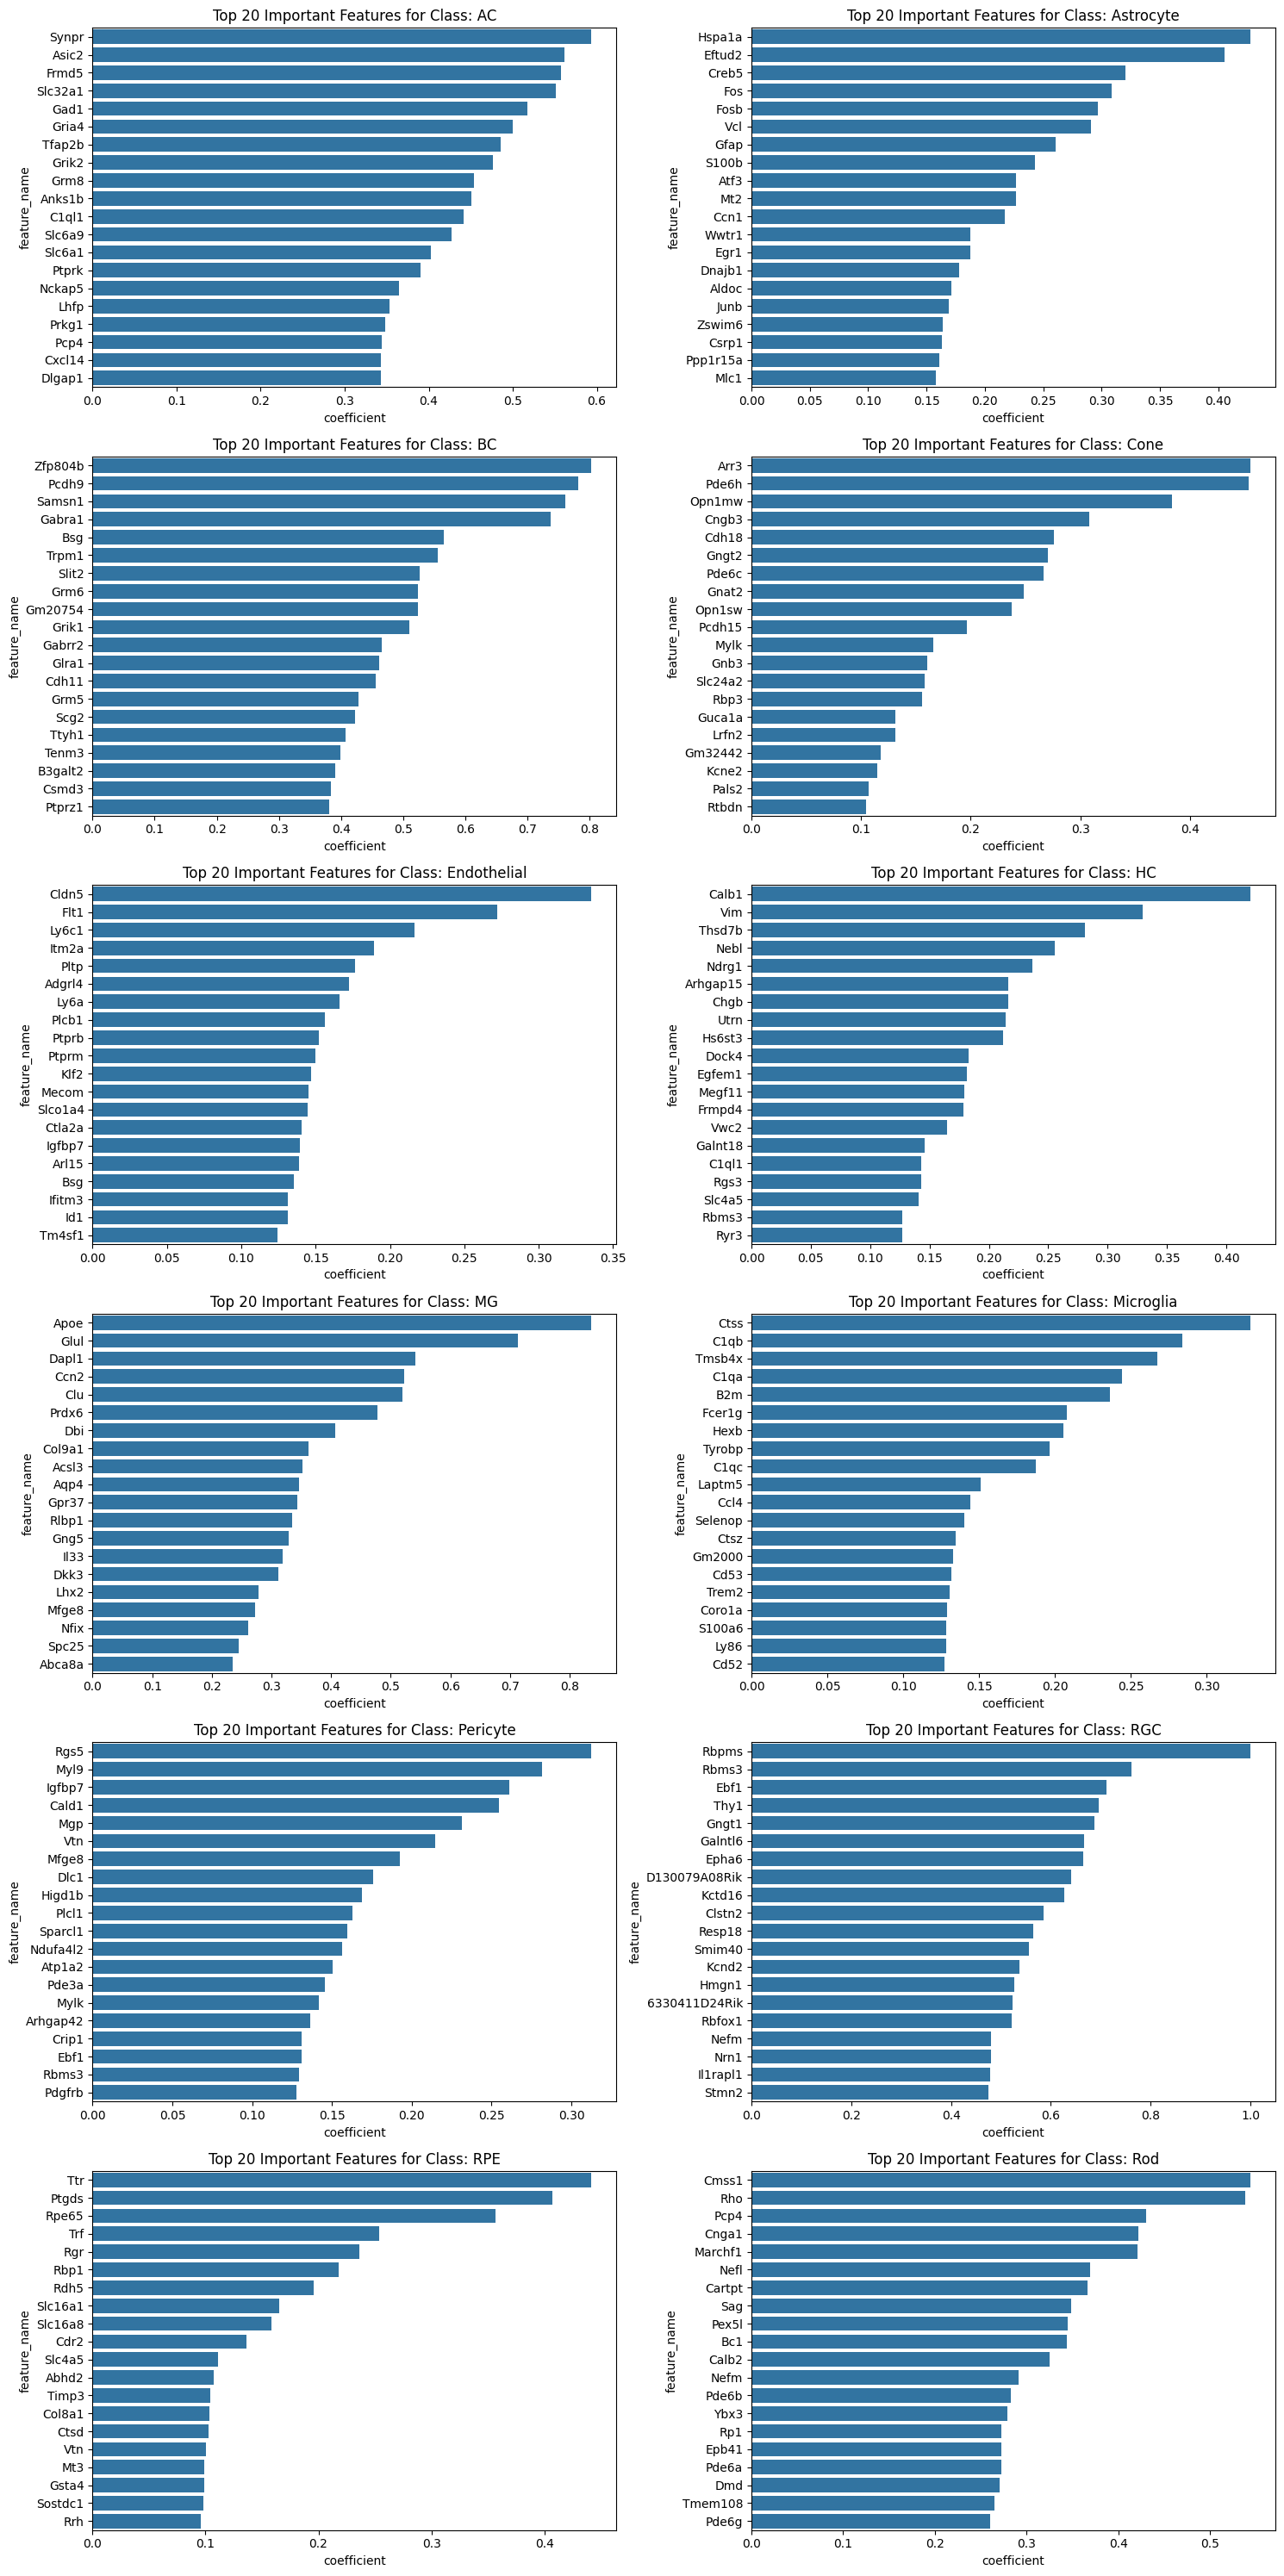

In [ ]:
# Get class-specific coefficients
class_coefficients = ovr_classifier.coef_

# Number of classes
num_classes = len(le.classes_)

number_of_features = 20

# Determine the grid size (e.g., 2 rows, num_classes / 2 columns)
nrows = (num_classes // 2) + (num_classes % 2)
ncols = 2

# Create a figure with subplots
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 5 * nrows))
axes = axes.flatten()  # Flatten the 2D array of axes to 1D

# Plot the top 5 important features for each class in a grid
for idx, class_name in enumerate(le.classes_):
    coefficients = class_coefficients[idx]
    feature_importance_ovr_df = pd.DataFrame({
        'ESUM': adata.var_names,
        'feature_name': adata.var['feature_name'].astype(str),  # Ensure feature_name is string
        'coefficient': coefficients
    })
    feature_importance_ovr_df = feature_importance_ovr_df.sort_values(by='coefficient', ascending=False).head(number_of_features)

    # Plot the top 20 important features for each class
    sns.barplot(ax=axes[idx], x='coefficient', y='feature_name', data=feature_importance_ovr_df)
    axes[idx].set_title(f'Top {number_of_features} Important Features for Class: {class_name}')

# Remove any unused subplots
for ax in axes[num_classes:]:
    ax.remove()

plt.tight_layout()

plt.savefig('figures/modeling/ovr_feature_importance_by_majorclass')

plt.show()


## Quality of Life

In [68]:
import dill

# Save the entire session
filename = 'modeling_notebook_state.pkl'
with open(filename, 'wb') as f:
    dill.dump_session(f)

In [ ]:
import dill

# Load the saved session
filename = 'modeling_notebook_state.pkl'
with open(filename, 'rb') as f:
    dill.load_session(f)

NameError: name 'UnpicklingError' is not defined